In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import math
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d
from scipy.stats import entropy
from collections import Counter

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling


#  1. Carga de datos

In [24]:
train_url = "./modelsData/trafficWeatherAccident.csv"
data = pd.read_csv(train_url)


In [ ]:
data.head()

# 2. Conversion de dataset aplicando tecnica de one hot encoding
Se aplicó one hot encoding a cada variable clasificatoria

In [25]:
dfDummies1 = pd.get_dummies(data['zona'], prefix = 'zona')
dfDummies2 = pd.get_dummies(data['subZona'], prefix = 'subZona')
dfDummies3 = np.sin(data['hora']) 
dfDummies4 = pd.get_dummies(data['linkName'], prefix = 'linkName') 
dfDummies5 = pd.get_dummies(data['descripcionClima'], prefix = 'clima') 

In [26]:
df = pd.concat([data, dfDummies1,dfDummies2,dfDummies3,dfDummies4,dfDummies5], axis=1)


# 3. Particionando los datos
Se selecciona que parte del dataset va a ser para entrenamiento y testing, para dbscan se redujo el dataset a un 60%

In [27]:
from sklearn.model_selection import train_test_split
df = df.drop(["zona","subZona", "hora","descripcionClima","encodedPolyLine","latitude","longitude","linkName","date"], axis = 1)  
df = df[:round(1*data.shape[0])]
X_train, X_test = train_test_split(df, test_size=.2, random_state=42)

In [19]:
X_train.shape

(1214384, 264)

In [12]:
# import library for 3D plotting
from mpl_toolkits import mplot3d

# magic function for interactive plot
%matplotlib notebook

# 4. Reduccion de dimensiones
Se redujo las 264 dimensiones a 3 para graficarlo en 3 dimensiones

In [13]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [13]:
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-140.184985,76.946893,9.022058
1,-127.188569,54.789756,-31.751452
2,-119.776912,-9.153212,29.878671
3,-96.924261,176.361899,14.150762
4,35.676143,-152.740554,14.984539


# 5. Grafica en 3 dimensiones

<IPython.core.display.Javascript object>


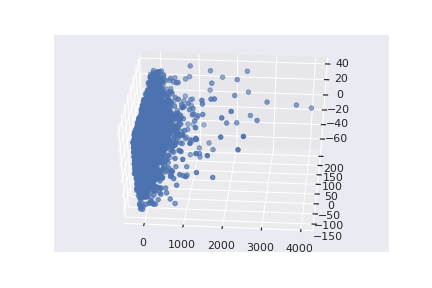

In [29]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(principalDf["principal component 1"].iloc[:5000],
             principalDf["principal component 2"].iloc[:5000],
             principalDf["principal component 3"].iloc[:5000])

# 6. Metodo del codo
Se busca probar con que cantidad de cluster el modelo se comporta de una mejor manera por lo que se usa el metodo del codo buscando el punto que nos diga e k optimo.

In [15]:
codo = []

In [17]:
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    print("trained ",k)
    codo.append((kmeans.inertia_,k,kmeans.cluster_centers_))

trained  1
trained  2
trained  3
trained  4
trained  5
trained  6
trained  7
trained  8
trained  9


In [17]:
xplot = [x[1] for x in codo]
yplot = [x[0] for x in codo]

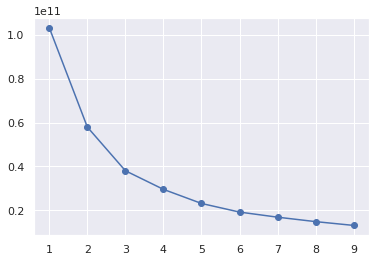

In [18]:
plt.plot(xplot, yplot,  marker = 'o')
plt.show()


# 7. entrenamiento con 3 clusters

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# 8. grafica kmeans con 3 clusters

In [21]:
cluster_map = pd.DataFrame()
cluster_map['cluster'] = kmeans.labels_
cluster_map = pd.concat([cluster_map, 
                         principalDf["principal component 1"],
                         principalDf["principal component 2"],
                         principalDf["principal component 3"]], axis=1)

<IPython.core.display.Javascript object>


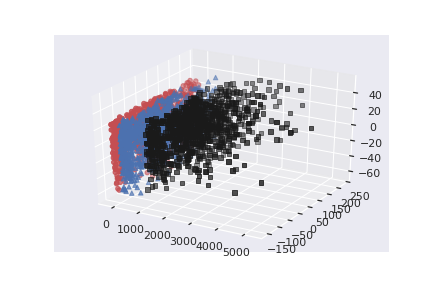

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dataShow = 1000

ax.scatter3D(cluster_map[cluster_map.cluster == 0]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map.cluster == 0]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(cluster_map[cluster_map.cluster == 1]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map.cluster == 1]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map.cluster == 1]["principal component 3"].iloc[:dataShow], c='b', marker='^')
ax.scatter3D(cluster_map[cluster_map.cluster == 2]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map.cluster == 2]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')


# 9. entrenamiento con  4 clusters

In [23]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
cluster_map4 = pd.DataFrame()
cluster_map4['cluster'] = kmeans4.labels_
cluster_map4 = pd.concat([cluster_map4, 
                         principalDf["principal component 1"],
                         principalDf["principal component 2"],
                         principalDf["principal component 3"]], axis=1)

# 10. grafica kmeans 4 clusters

<IPython.core.display.Javascript object>


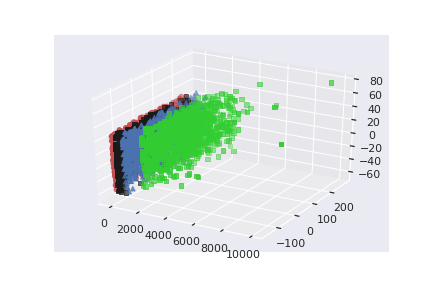

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dataShow = 1000

ax.scatter3D(cluster_map[cluster_map4.cluster == 0]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map4.cluster == 0]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map4.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(cluster_map[cluster_map4.cluster == 1]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map4.cluster == 1]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map4.cluster == 1]["principal component 3"].iloc[:dataShow], c='b', marker='^')
ax.scatter3D(cluster_map[cluster_map4.cluster == 2]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map4.cluster == 2]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map4.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')
ax.scatter3D(cluster_map[cluster_map4.cluster == 3]["principal component 1"].iloc[:dataShow], 
           cluster_map[cluster_map4.cluster == 3]["principal component 2"].iloc[:dataShow],
           cluster_map[cluster_map4.cluster == 3]["principal component 3"].iloc[:dataShow], c='limegreen', marker='s')

# 11. entrenamiento con 5 clusters

In [26]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:

dataShow = 1000

cluster_map_5 = pd.DataFrame()
cluster_map_5['cluster'] = kmeans5.labels_
cluster_map_5 = pd.concat([cluster_map_5, 
                         principalDf["principal component 1"],
                         principalDf["principal component 2"],
                         principalDf["principal component 3"]], axis=1)


# 12. Grafica kmeans 5 clusters

<IPython.core.display.Javascript object>


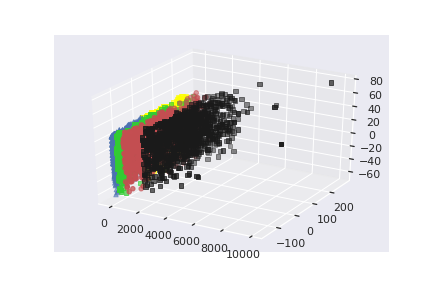

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(cluster_map_5[cluster_map_5.cluster == 0]["principal component 1"].iloc[:dataShow], 
           cluster_map_5[cluster_map_5.cluster == 0]["principal component 2"].iloc[:dataShow],
           cluster_map_5[cluster_map_5.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(cluster_map_5[cluster_map_5.cluster == 1]["principal component 1"].iloc[:dataShow], 
           cluster_map_5[cluster_map_5.cluster == 1]["principal component 2"].iloc[:dataShow],
           cluster_map_5[cluster_map_5.cluster == 1]["principal component 3"].iloc[:dataShow], c='b', marker='^')
ax.scatter3D(cluster_map_5[cluster_map_5.cluster == 2]["principal component 1"].iloc[:dataShow], 
           cluster_map_5[cluster_map_5.cluster == 2]["principal component 2"].iloc[:dataShow],
           cluster_map_5[cluster_map_5.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')
ax.scatter3D(cluster_map_5[cluster_map_5.cluster == 3]["principal component 1"].iloc[:dataShow], 
           cluster_map_5[cluster_map_5.cluster == 3]["principal component 2"].iloc[:dataShow],
           cluster_map_5[cluster_map_5.cluster == 3]["principal component 3"].iloc[:dataShow], c='limegreen', marker='s')
ax.scatter3D(cluster_map_5[cluster_map_5.cluster == 4]["principal component 1"].iloc[:dataShow], 
           cluster_map_5[cluster_map_5.cluster == 4]["principal component 2"].iloc[:dataShow],
           cluster_map_5[cluster_map_5.cluster == 4]["principal component 3"].iloc[:dataShow], c='yellow', marker='s')

# Centroides con sus respectivos descritpores K-Means K = 3

In [45]:
for i in kmeans_3.cluster_centers_:
    print("other cluster-------------------------------------------")
    for j in zip(X_train.columns,i):
        print(j)


other cluster-------------------------------------------
('velocidadProm', 20.577006809717222)
('tiempoProm', 532.6244215560641)
('diaSemana', 4.0157247840260775)
('numeroVehiculos', 16.267202238883666)
('humedad', 67.69567903377991)
('presion', 1020.5580115020654)
('temperatura', 289.83494731686744)
('windDirection', 144.51160378906226)
('windSpeed', 2.1963034269668773)
('accidentes', 1.4104421696134446)
('heridos', 0.6792521175613232)
('muertos', 0.003076480308046077)
('zona_bronx', 0.13529070257882186)
('zona_brooklyn', 0.09823400106189911)
('zona_manhattan', 0.418699045795518)
('zona_queens', 0.3223258191128905)
('zona_staten island', 0.025450431451902178)
('subZona_Arlington', 0.0)
('subZona_Astoria', 0.07231713549899918)
('subZona_Bay Ridge', 0.004813203062594076)
('subZona_Bay Terrace', 0.026601630534573817)
('subZona_Beechhurst', 0.03723533585738399)
('subZona_Belmont', 0.0038902589701886254)
('subZona_Bloomfield', 0.0023123222960886626)
('subZona_Briarwood', 0.0030318217229247

# 13. Inicio dbscan

In [ ]:
import numpy as np

def train_model(X,eps,samples):
    model = DBSCAN(eps=eps, min_samples=samples)
    model.fit(X)
    return model
    





# 14. Entrenamiento en paralelo para hallar la eps ideal
Se entrena 14 modelos de dbscan con una eps diferente desde el 10 al 150

In [ ]:
from joblib import Parallel, delayed
result = Parallel(n_jobs=16)(delayed(train_model)(X_train,i*10,50) for i in range(1,15))

# 15. Calculo de la entropia

In [ ]:
max_size = X_train.shape[0]

entropy_all = []
for db in result:
    counted = Counter(db.labels_)
    prob = [counted[i]/max_size for i in counted.keys()]
    entropy_all.append(entropy(pk = prob, base = 2))

In [284]:
y_dbscan = entropy_all
x_dbscan = [i * 10 for i in range(1,15)]



    

# 16. Grafica de la entropia

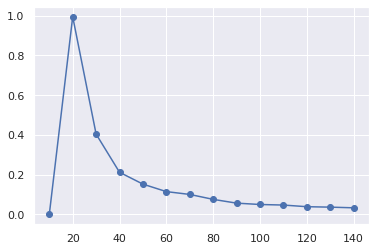

In [282]:
plt.plot(x_dbscan, y_dbscan,  marker = 'o')
plt.show()

# 17. Entrenamiento en paralelo para hallar el min samples ideal
Se entreno en paralelo 15 diferentes modelos dbscan con un min samples incremental de 10 a 150 para encontrar el dbscan ideal

In [ ]:
result_samples = Parallel(n_jobs=16)(delayed(train_model)(X_train,40,i*150) for i in range(1,15))

# 18. Calculo de la entropia para cada cluster
Se debe hacer uso de la entropia ya que los minimos cuadrados no son utiles en los modelos de agrupamiento por densidad

In [273]:
entropy_all_samples = []
for db in result_samples:
    counted = Counter(db.labels_)
    prob = [counted[i]/max_size for i in counted.keys()]
    entropy_all_samples.append(entropy(pk = prob, base = 2))

In [274]:
y_dbscan_samples = entropy_all_samples
x_dbscan_samples = [i * 10 for i in range(1,15)]

# 19. Grafica de la entropia vs min_samples
La grafica no es analizable para obtener conclusiones

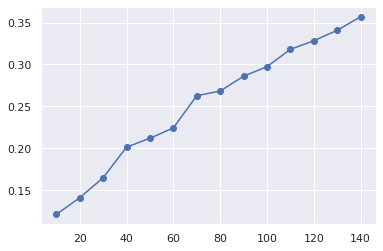

In [275]:
plt.plot(x_dbscan_samples, y_dbscan_samples,  marker = 'o')
plt.show()

# 20. Entrenamiento  de 30 modelos en paralelo
Como la anterior grafica no dio la suficiente información se busca expandir la grafica y encontrar una figura semejante a un codo o rodilla

In [ ]:
result_samples_2 = Parallel(n_jobs=16)(delayed(train_model)(X_train,40,(i*10)+150) for i in range(1,30))

In [ ]:
result_samples_2[20].labels_

In [ ]:

entropy_all_samples_2 = []
for db in result_samples_2:
    counted = Counter(db.labels_)
    prob = [counted[i]/max_size for i in counted.keys()]
    n_clusters_ = len(set(db.labels_)) - (1 if -1 in labels else 0)
    print(n_clusters_)
    entropy_all_samples_2.append(entropy(pk = prob, base = 2))

In [269]:
y_dbscan_samples_2 = entropy_all_samples_2
x_dbscan_samples_2 = [i * 10 + 150 for i in range(1,30)]

# 21. Grafica entropia vs min_samples

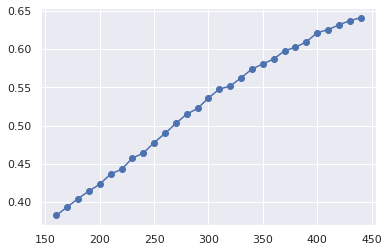

In [272]:
plt.plot(x_dbscan_samples_2, y_dbscan_samples_2,  marker = 'o')
plt.show()

# 22. Calculo de la correlacion para dbscan
Ya que el anterior emtodo no nos da la suficiente información para encontrar el min_samples, se calculó la correlacion para cada modelo, para encontrar la más alta.
<br>
Como nos interesa ambos extremos de la correlacion (tanto negativa como positiva) se hizo el valor absoluto y se sumo toda las correlacion, luego al ser una matriz simetrica se dividio entre 2.

In [ ]:

def samples(db):
    df_result_samples =pd.DataFrame(data=db.components_[0:,0:],
                                    index=[i for i in range(db.components_.shape[0])],
                                    columns=['f'+str(i) for i in range(db.components_.shape[1])])
    corr_result_samples = df_result_samples.corr(method="pearson")
    corr_result_samples = abs(corr_result_samples)
    corr_result_samples = corr_result_samples.fillna(0)
    
    return [corr_result_samples.values.sum()/2,db.min_samples]

In [ ]:
corrAll_samples_1 = Parallel(n_jobs=16)(delayed(samples)(db) for db in result_samples)

# 23. Grafica de la correlacion por cada modelo dbscan

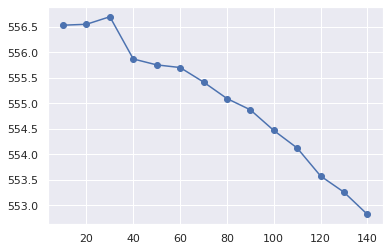

In [294]:
corrAll_samples_1
x_samples_1 = [i[1] for i in corrAll_samples_1]
y_samples_1 = [i[0] for i in corrAll_samples_1]
plt.plot(x_samples_1, y_samples_1,  marker = 'o')
plt.show()

# 23. Entrenamiento final de dbscan con los valores ideales
Al haber encontrado los valores ideales porcedemos a entrenarlo, el dataset fue reducido a un 40% - 60%  por cuestiones de capacidad en el DCA

In [26]:
dbscanFinal = DBSCAN(eps=40, min_samples=30, n_jobs=-2)

In [ ]:
dbscanFinal.fit(X_train)

In [14]:
dbscan_map = pd.DataFrame()
dbscan_map['cluster'] = dbscanFinal.labels_
dbscan_map = pd.concat([dbscan_map, 
                         principalDf["principal component 1"],
                         principalDf["principal component 2"],
                         principalDf["principal component 3"]], axis=1)


# 24. Grafica de dbscan con el 60% del dataset sin los outliers graficado
Se muestra la grafica sin los outliers para tener una buena abstraccion de los grupos generados.

<IPython.core.display.Javascript object>


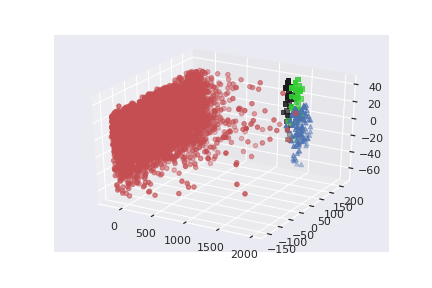

In [18]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dataShow = 5000


ax.scatter3D(dbscan_map[dbscan_map.cluster == 0]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 0]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 1]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 1]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 1]["principal component 3"].iloc[:dataShow], c='b', marker='^')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 2]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 2]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 3]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 3]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 3]["principal component 3"].iloc[:dataShow], c='limegreen', marker='s')


# 25. Grafica de dbscan con outliers
En esta grafica se puede ver la misma que la anterior pero con los outliers graficados alrededor de los grupos.

<IPython.core.display.Javascript object>


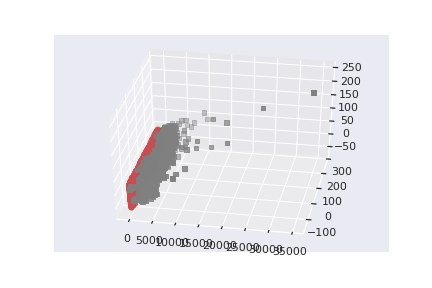

In [17]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dataShow = 5000

ax.scatter3D(dbscan_map[dbscan_map.cluster == -1]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == -1]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == -1]["principal component 3"].iloc[:dataShow], c='gray', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 0]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 0]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 1]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 1]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 1]["principal component 3"].iloc[:dataShow], c='b', marker='^')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 2]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 2]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 3]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 3]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 3]["principal component 3"].iloc[:dataShow], c='limegreen', marker='s')


# 26. Grafica de dbscan con el 40% de los datos sin outliers
Se muestra la grafica sin los outliers para tener una buena abstraccion de los grupos generados.

<IPython.core.display.Javascript object>


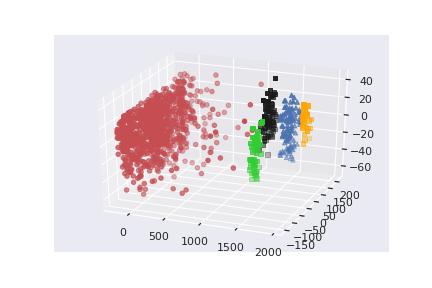

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dataShow = 1000

ax.scatter3D(dbscan_map[dbscan_map.cluster == 0]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 0]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 1]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 1]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 1]["principal component 3"].iloc[:dataShow], c='b', marker='^')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 2]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 2]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 3]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 3]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 3]["principal component 3"].iloc[:dataShow], c='limegreen', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 4]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 4]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 4]["principal component 3"].iloc[:dataShow], c='orange', marker='s')

# 27. Grafica de dbscan con outliers
En esta grafica se puede ver la misma que la anterior pero con los outliers graficados alrededor de los grupos.

<IPython.core.display.Javascript object>


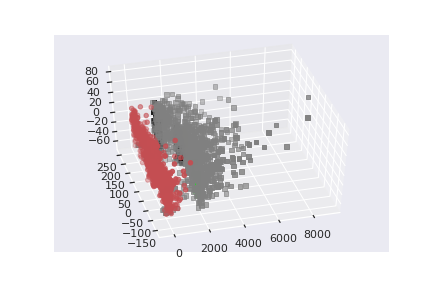

In [38]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dataShow = 1000

ax.scatter3D(dbscan_map[dbscan_map.cluster == 0]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 0]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 0]["principal component 3"].iloc[:dataShow], c='r', marker='o')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 1]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 1]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 1]["principal component 3"].iloc[:dataShow], c='black', marker='^')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 2]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 2]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 2]["principal component 3"].iloc[:dataShow], c='k', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == -1]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == -1]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == -1]["principal component 3"].iloc[:dataShow], c='gray', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 3]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 3]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 3]["principal component 3"].iloc[:dataShow], c='limegreen', marker='s')
ax.scatter3D(dbscan_map[dbscan_map.cluster == 4]["principal component 1"].iloc[:dataShow], 
           dbscan_map[dbscan_map.cluster == 4]["principal component 2"].iloc[:dataShow],
           dbscan_map[dbscan_map.cluster == 4]["principal component 3"].iloc[:dataShow], c='orange', marker='s')